In [200]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro


In [201]:
dataset_name = "bigquery-public-data.austin_crime.crime"
query = f"""
select * from {dataset_name}
"""
crime_df = pd.read_gbq(query);

/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1967: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df[column] = pandas.Series(df[column], dtype=dtypes[column])


In [198]:
def get_row(column,dataset_name):
    col = column.sample(1000)

    col_mean = np.nan
    col_median = np.nan
    col_std = np.nan
    wilk_test = np.nan

    if col.dtype in [np.dtype('int') ,np.dtype('float')]:
        col_mean = col.mean()
        col_std = col.std()
        col_median = col.median()
        _, wilk_test = shapiro(col) # Normality when the p-value is greater than or equal to 0.05
        
    rows={
        'dataset_name': [dataset_name],
        'column_name':[column.name],
        "column_values": [', '.join(map(str,col.tolist()))],
        "nunique_values":[col.nunique()],
        "mean" : col_mean,
        "std" : col_std,
        "median" : col_median,
        "shapiro_wilk_test":[wilk_test],
        "label":[np.nan]
    }
    
    return pd.DataFrame.from_dict(rows)

In [203]:
gbq_list = ['bigquery-public-data.austin_bikeshare.bikeshare_trips',
            'bigquery-public-data.census_bureau_usa.population_by_zip_2010',
            'bigquery-public-data.census_bureau_international.birth_death_growth_rates',
            'bigquery-public-data.census_bureau_international.midyear_population_5yr_age_sex',
            'bigquery-public-data.census_bureau_international.mortality_life_expectancy',
            'bigquery-public-data.covid19_geotab_mobility_impact.airport_traffic',
            'bigquery-public-data.covid19_geotab_mobility_impact.us_border_volumes',
            'bigquery-public-data.covid19_nyt.excess_deaths',
            'bigquery-public-data.covid19_nyt.mask_use_by_county',
            'bigquery-public-data.fda_drug.drug_enforcement',
            'bigquery-public-data.geo_us_boundaries.adjacent_counties',
            'bigquery-public-data.geo_us_boundaries.states',
            'bigquery-public-data.google_ads.geotargets',
            'bigquery-public-data.hacker_news.comments',
            'bigquery-public-data.london_bicycles.cycle_stations',
            'bigquery-public-data.london_fire_brigade.fire_brigade_service_calls',
            'bigquery-public-data.nasa_wildfire.past_week',
            'bigquery-public-data.new_york.citibike_stations',
            'bigquery-public-data.new_york_subway.geo_nyc_borough_boundaries',
            'bigquery-public-data.new_york_subway.stations',
            'bigquery-public-data.new_york_subway.stop_times',
            'bigquery-public-data.san_francisco.bikeshare_stations',
            'bigquery-public-data.san_francisco.bikeshare_trips',
            'bigquery-public-data.san_francisco_trees.street_trees',
            'bigquery-public-data.world_bank_global_population.population_by_country',
            'bigquery-public-data.world_bank_health_population.country_summary'
            ]

In [205]:
for dataset_name in gbq_list[:3]:
    query = f"""
    select * from {dataset_name}
    """
    df = pd.read_gbq(query)
    
    dataset_rows = [get_row(df[col_name],dataset_name) for col_name in df]
    print(dataset_name, 'Completed!')
    # output_dataset = pd.concat(dataset_rows, axis=0).reset_index(drop=True)
    # output_dataset.head(10)


## DO NOT TOUCH!

In [199]:
dataset_name = "bigquery-public-data.austin_crime.crime"
dataset_rows = [get_row(crime_df[col_name],dataset_name) for col_name in crime_df]
output_dataset = pd.concat(dataset_rows, axis=0).reset_index(drop=True)
output_dataset.head(10)
    

,dataset_name,column_name,column_values,nunique_values,mean,std,median,shapiro_wilk_test,label
0,bigquery-public-data.austin_crime.crime,unique_key,"20145040798.0, 20155003516.0, 20151881192.0, 2...",1000,1.770501e+10,6.230494e+09,2.015214e+10,0.0,NaN
1,bigquery-public-data.austin_crime.crime,address,"1715 W CESAR CHAVEZ ST Austin, TX 78703 (30.27...",888,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_crime.crime,census_tract,"18.21, 24.28, 23.07, 6.04, 18.39, 18.4, 12.0, ...",178,8.352951e+01,7.595945e+02,1.819000e+01,1.0,NaN
3,bigquery-public-data.austin_crime.crime,clearance_date,"2015-05-21 12:00:00+00:00, 2014-05-29 12:00:00...",569,NaN,NaN,NaN,NaN,NaN
4,bigquery-public-data.austin_crime.crime,clearance_status,"Not cleared, Not cleared, Not cleared, Not cle...",3,NaN,NaN,NaN,NaN,NaN
5,bigquery-public-data.austin_crime.crime,council_district_code,"1.0, 4.0, 1.0, 2.0, 4.0, 5.0, 4.0, 7.0, 3.0, 3...",10,5.297679e+00,2.852464e+00,5.000000e+00,1.0,NaN
6,bigquery-public-data.austin_crime.crime,description,"BURGLARY NON RESIDENCE , BURG NON RESID...",30,NaN,NaN,NaN,NaN,NaN
7,bigquery-public-data.austin_crime.crime,district,"B, D, F, E, I, B, I, E, A, F, G, D, D, C, G, F...",11,NaN,NaN,NaN,NaN,NaN
8,bigquery-public-data.austin_crime.crime,latitude,"30.23763, nan, nan, nan, 30.264273, nan, 30.26...",270,3.029117e+01,7.353777e-02,3.027568e+01,1.0,NaN
9,bigquery-public-data.austin_crime.crime,longitude,"nan, nan, nan, -97.83889, nan, nan, -97.739377...",266,-9.773527e+01,4.765600e-02,-9.772925e+01,1.0,NaN


## Shapiro Value > 0.5 indicates Normality

/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

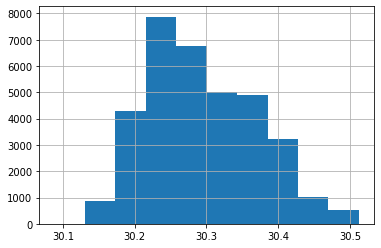

In [197]:
crime_df.latitude.hist()
shapiro(crime_df.latitude)
